In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False


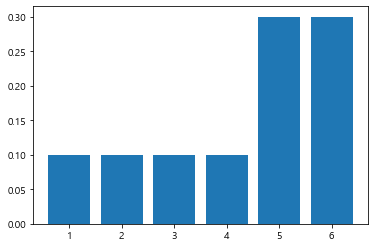

In [3]:
import scipy.stats as stats
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = stats.multinomial(1, mu)

xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.show()

In [4]:
def P(a, b):
    if a > b:
        raise ValueError('a must be less than b or equal to b')
    
    else:
        a = np.maximum(a, 0)
        b = np.minimum(b, 360)

        if b < 180:
            return (2/3) * ((b-a) / 180)
        else:
            if a < 180:
                return(2/3) * ((180-a)/180) + (1/3) * ((b-180)/180)
            else:
                return (1/3) * ((((b-a)/180)))
P(0,270)

0.8333333333333333

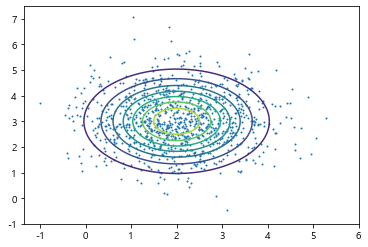

In [9]:
mu = [2,3]
cov = [[1,0], [0,1]]

rv = stats.multivariate_normal(mu, cov)
X = rv.rvs(1000)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:,0], X[:,1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX,YY])))
plt.show()

In [10]:
grades = ["A", "B", "C", "D", "E", "F"]
scores = pd.DataFrame([[2, 2, 1, 0, 1, 0],
                     [0, 1, 1, 0, 2, 0],
                     [0, 2, 8, 6, 0, 0],
                     [1, 0, 0, 5, 2, 0],
                     [0, 0, 2, 5, 4, 1],
                     [0, 0, 0, 0, 2, 2]],
                    columns=grades, index=grades) 
scores.index.name = 'Y'
scores.columns.name = 'X'
scores

X,A,B,C,D,E,F
Y,,,,,,
A,2,2,1,0,1,0
B,0,1,1,0,2,0
C,0,2,8,6,0,0
D,1,0,0,5,2,0
E,0,0,2,5,4,1
F,0,0,0,0,2,2


In [11]:
pmf = scores / scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.04,0.04,0.02,0.00,0.02,0.00
B,0.00,0.02,0.02,0.00,0.04,0.00
C,0.00,0.04,0.16,0.12,0.00,0.00
D,0.02,0.00,0.00,0.10,0.04,0.00
E,0.00,0.00,0.04,0.10,0.08,0.02
F,0.00,0.00,0.00,0.00,0.04,0.04


In [17]:
mu = np.array([2,3])
cov = np.array([[4,3],[3,5]])
w, V = np.linalg.eig(cov)
print(w)
print(V)
'''
[1.45861873 7.54138127]
[[-0.76301998 -0.6463749 ]
 [ 0.6463749  -0.76301998]
'''

[1.45861873 7.54138127]
[[-0.76301998 -0.6463749 ]
 [ 0.6463749  -0.76301998]]


'\n[1.45861873 7.54138127]\n[[-0.76301998 -0.6463749 ]\n [ 0.6463749  -0.76301998]\n'

In [20]:
def plot_triangle(X, kind):
  n1 = np.array([1, 0, 0])
  n2 = np.array([0, 1, 0])
  n3 = np.array([0, 0, 1])
  n12 = (n1 + n2) / 2
  m1 = np.array([1, -1, 0])
  m2 = n3 - n12
  m1 = m1 / np.linalg.norm(m1)
  m2 = m2 / np.linalg.norm(m2)

  X1 = (X - n12).dot(m1)
  X2 = (X - n12).dot(m2)

  sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
  plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


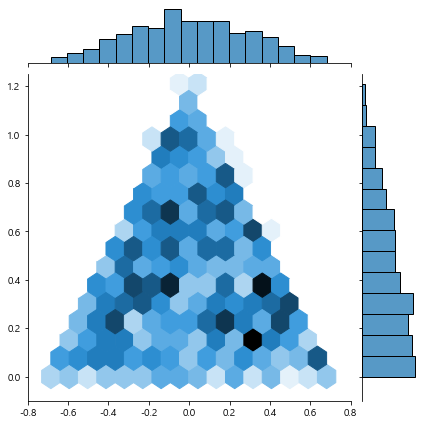

In [24]:
np.random.seed(0)
X = stats.dirichlet((1,1,1)).rvs(1000)
plot_triangle(X, kind='hex')

In [25]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM'>

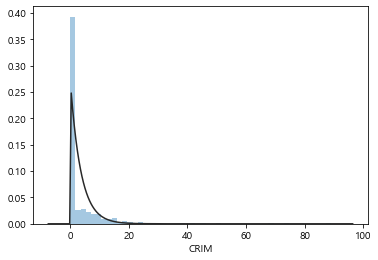

In [30]:
sns.distplot(df['CRIM'], kde=False, fit=stats.expon)